# Problem1: Bias Variance Tradeoff,  Regularization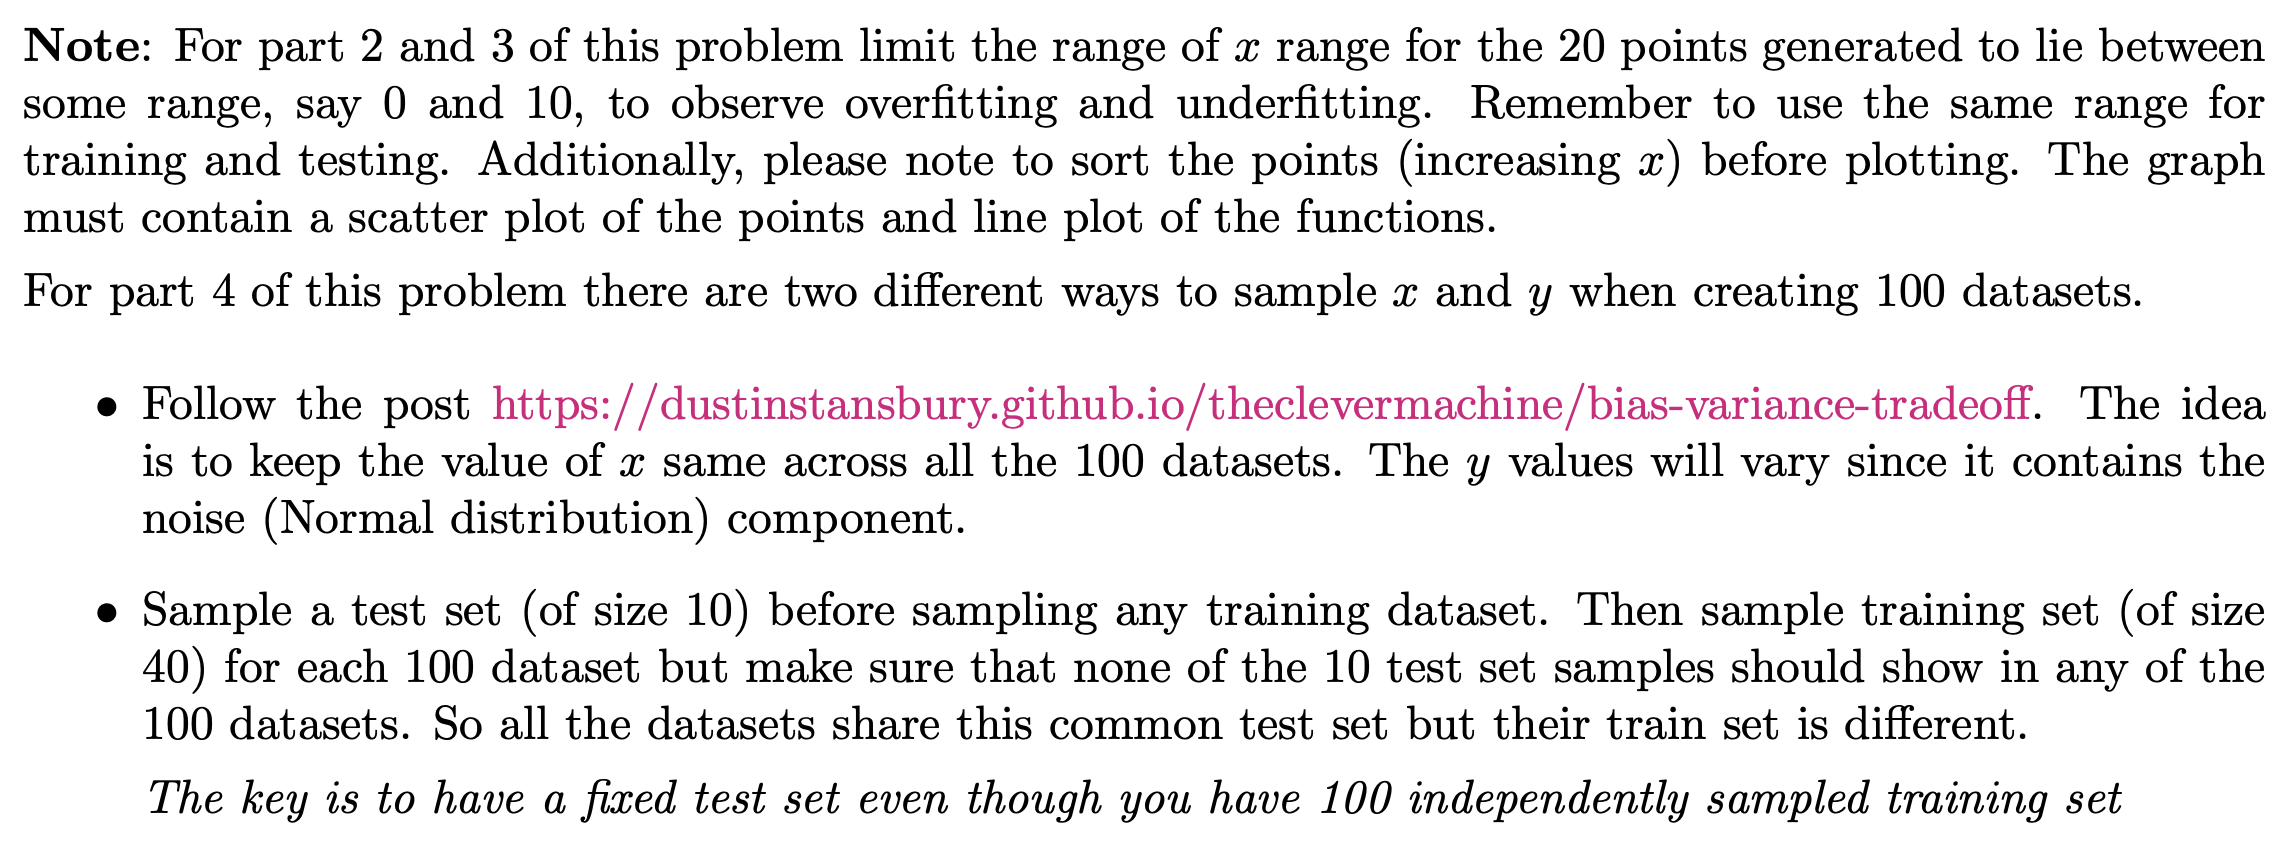

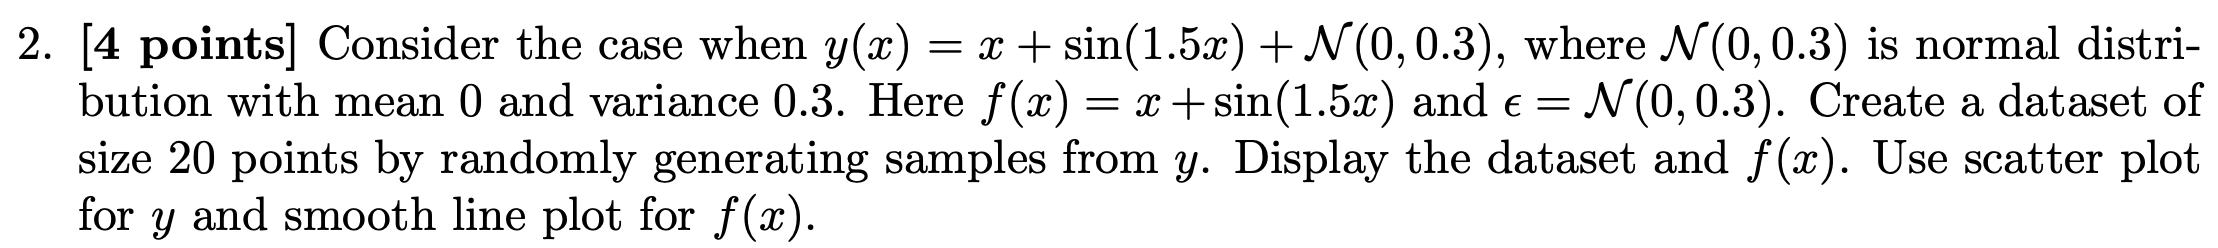

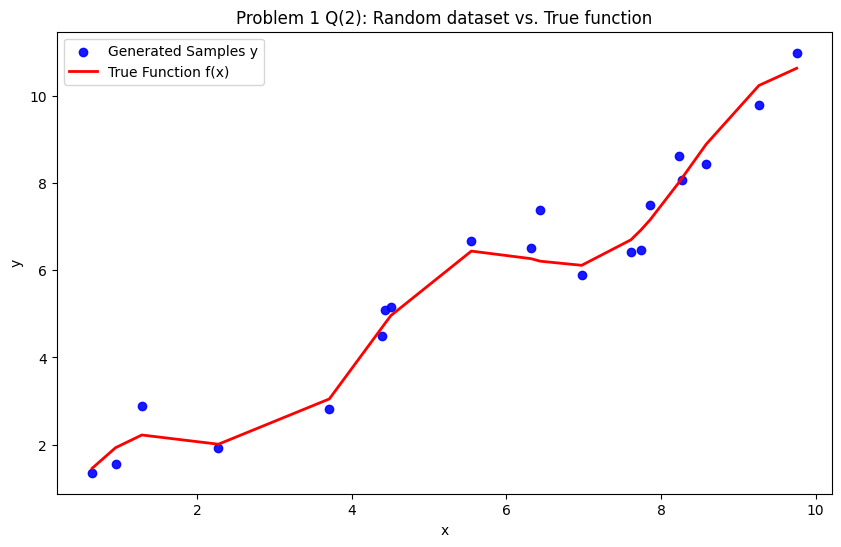

In [9]:
import numpy as np
import matplotlib.pyplot as plt

rng = np.random.default_rng(42)

# y(x) = x + sin(1.5x) + N(0,0.3):: N(0,0.3) normal distribution with mean 0 and var 0.3
x_vals = np.sort(rng.uniform(0,10,size=20))  # generates 20 points between 0 to 10
f_func = x_vals + np.sin(1.5 * x_vals)
eps = rng.normal(0.0, np.sqrt(0.3), size=20)
y_vals = f_func + eps


plt.figure(figsize=(10,6))
plt.scatter(x_vals, y_vals, label="Generated Samples y",
            color="blue", alpha=0.9)
plt.plot(x_vals, f_func, label="True Function f(x)", color="red", linewidth=2)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Problem 1 Q(2): Random dataset vs. True function")
plt.legend()
plt.show()

In [11]:
import pandas as pd

data = pd.DataFrame({
    "x": x_vals,
    "y": y_vals})

print("Data Samples")
print(data)

Data Samples
           x          y
0   0.638173   1.354536
1   0.941773   1.556336
2   1.281136   2.889811
3   2.272387   1.923920
4   3.707980   2.813078
5   4.388784   4.491425
6   4.434142   5.085476
7   4.503859   5.159228
8   5.545848   6.665826
9   6.316644   6.502447
10  6.438651   7.380589
11  6.973680   5.890836
12  7.611397   6.418363
13  7.739560   6.476354
14  7.860643   7.498023
15  8.227616   8.622926
16  8.276312   8.062581
17  8.585979   8.433338
18  9.267650   9.788416
19  9.756224  10.991504


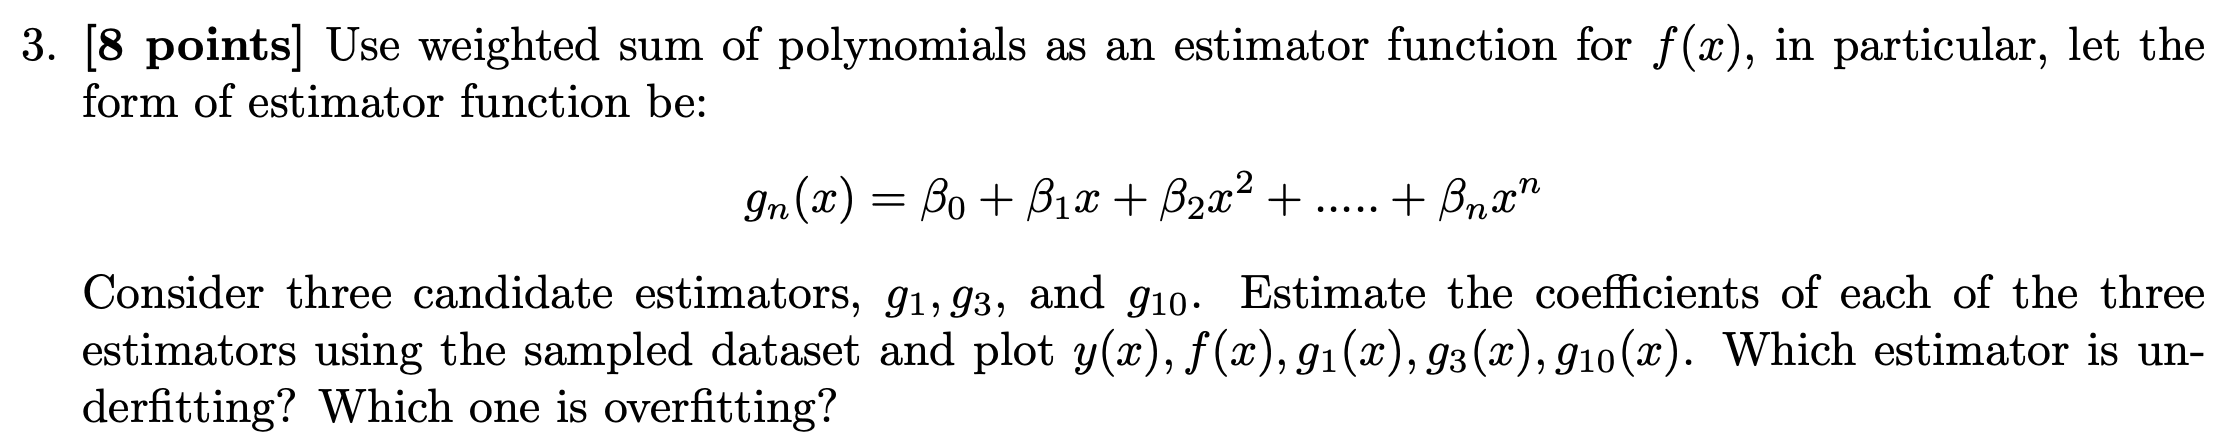

[degree=1] coefficients: beta0=0.6115, beta1=0.9216
[degree=3] coefficients: beta0=0.4472, beta1=1.4372, beta2=-0.1704, beta3=0.0132
[degree=10] coefficients: beta0=25.8368, beta1=-102.8192, beta2=164.1138, beta3=-131.4566, beta4=60.8306, beta5=-17.5576, beta6=3.2824, beta7=-0.3991, beta8=0.0305, beta9=-0.0013, beta10=0.0000


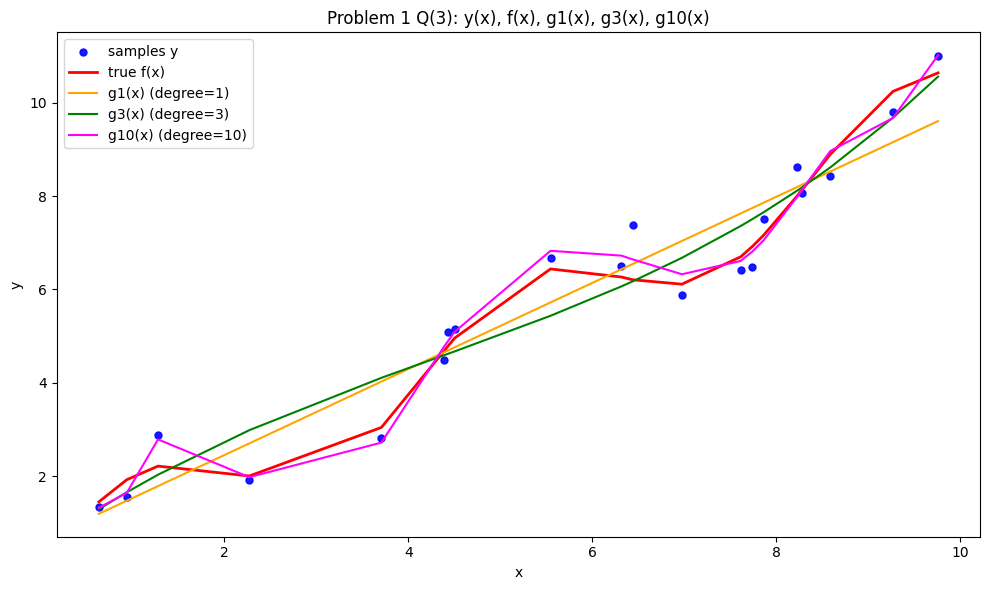

In [14]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

rng = np.random.default_rng(42)

# y(x) = x + sin(1.5x) + N(0,0.3):: N(0,0.3) normal distribution with mean 0 and var 0.3
x_vals = np.sort(rng.uniform(0,10,size=20))  # generates 20 points between 0 to 10
f_func = x_vals + np.sin(1.5 * x_vals)
eps = rng.normal(0.0, np.sqrt(0.3), size=20)
y_vals = f_func + eps

def fit_poly_and_coeffs(x, y, degree):
  poly = PolynomialFeatures(degree=degree, include_bias=False)
  X = poly.fit_transform(x.reshape(-1, 1))
  model = LinearRegression().fit(X, y)
  beta0 = model.intercept_
  betas = model.coef_
  return model, poly, beta0, betas

# g1, g3, g10
degrees = [1, 3, 10]
models ={}
for degree in degrees:
  model, poly, beta0, betas = fit_poly_and_coeffs(x_vals, y_vals, degree)
  models[degree] = (model, poly)
  coef_str = ", ".join([f"beta{i}={b:.4f}"
                        for i, b in enumerate([beta0, *betas])])
  print(f"[degree={degree}] coefficients: {coef_str}")

plt.figure(figsize=(10,6))
plt.scatter(x_vals, y_vals, s=25, label='samples y', color ="blue", alpha=0.9)
plt.plot(x_vals, f_func, label="true f(x)", color ="red", linewidth=2)

colors = {1:"orange", 3:"green", 10:"magenta"}
for degree in degrees:
  model, poly = models[degree]
  y_pred = model.predict(poly.transform(x_vals.reshape(-1,1)))
  plt.plot(x_vals, y_pred, label=f"g{degree}(x) (degree={degree})",
           color=colors[degree])

plt.xlabel("x")
plt.ylabel("y")
plt.title("Problem 1 Q(3): y(x), f(x), g1(x), g3(x), g10(x)")
plt.legend()
plt.tight_layout()
plt.show()

In [16]:
for degree in degrees:
  model, poly = models[degree]
  y_pred = model.predict(poly.transform(x_vals.reshape(-1, 1)))
  mse = mean_squared_error(y_vals, y_pred)
  print(f"Train MES (degree={degree}: {mse:.4f})")

Train MES (degree=1: 0.6159)
Train MES (degree=3: 0.5130)
Train MES (degree=10: 0.1004)


Among the three estimators, g1 underfits the data, while g10 overfits.
- g1(x): The linear model cannot capture the nonlinear shape of the true function f(x) = x + sin(1.5x). It produces a straight line that is too simple to represent the complexity of the data, resulting in the highest training error. This is a clear case of underfitting, characterized by high bias and low variance.
- g10(x): The tenth-degree polynomial achieves very low training error by closely following the sampled points. However, because the model also attempts to fit the nosie in the training data, the fitted curve oscillates significantly, leading to poor generalization on unseen samples. Thus, it is an example of overfitting, characterized by low bias and high variance.

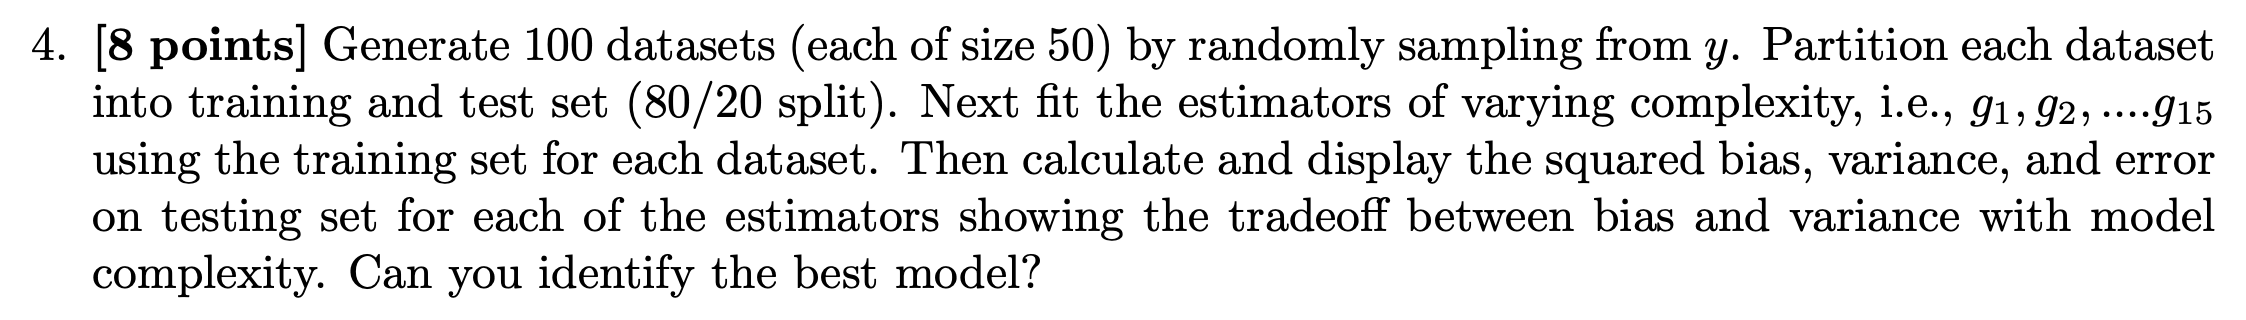

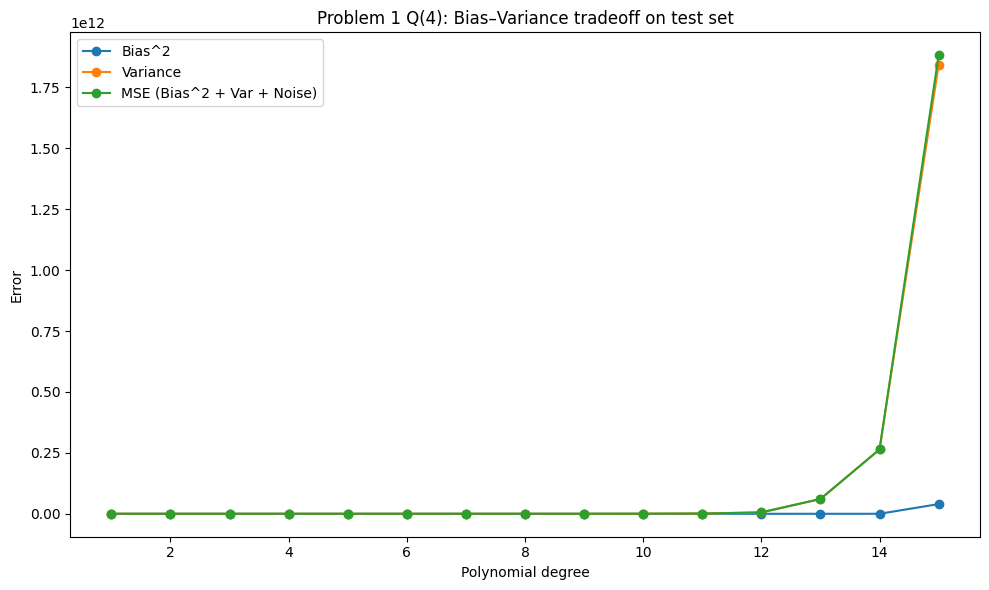

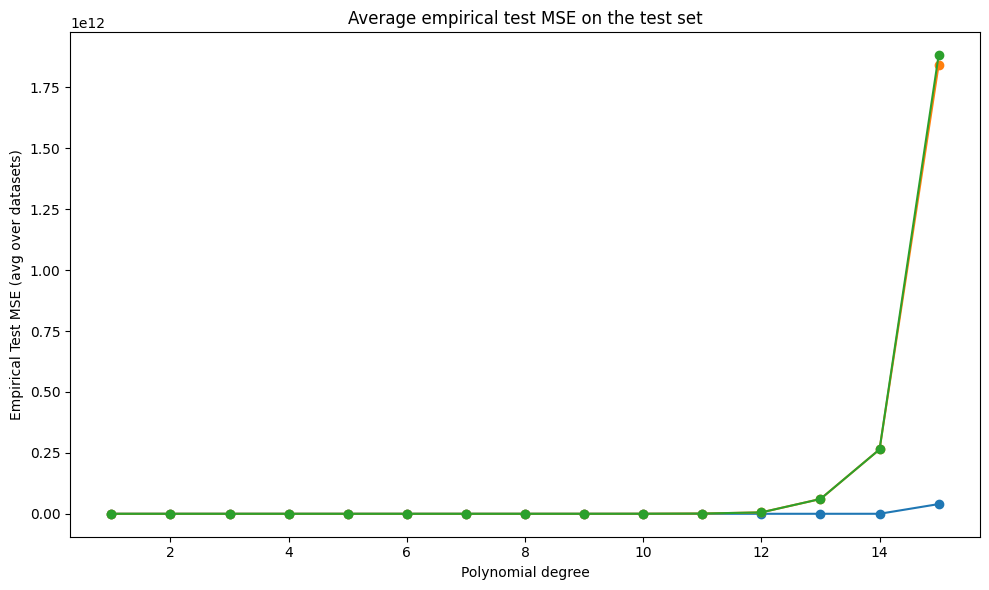

In [24]:
rng = np.random.default_rng(42)
num_dataset = 100
dataset_size = 50
train_frac = 0.8
num_train = int(dataset_size * train_frac)
num_test = dataset_size - num_train
degrees = range(1, 16)
NOISE_VAR = 0.3
NOISE_STD = np.sqrt(NOISE_VAR)

def f(x):
    return x + np.sin(1.5 * x)
def sample_xy(n):
    x = np.sort(rng.uniform(0, 10, size=n))
    y = f(x) + rng.normal(0, NOISE_STD, size=n)
    return x, y

# fix test set (no noise target for bias/variance)
x_test = np.sort(rng.uniform(0, 10, size=num_test))
y_true_test = f(x_test)

# generate 100 datasets (train only)
datasets = []
for _ in range(num_dataset):
    x_all, y_all = sample_xy(dataset_size)
    x_train, y_train = x_all[:num_train], y_all[:num_train]
    datasets.append((x_train, y_train))

# train & evaluate
bias_squared, variance, errors, avg_errors = [], [], [], []

for degree in degrees:
    preds = []
    mses = []
    for (x_train, y_train) in datasets:
        poly = PolynomialFeatures(degree=degree, include_bias=False)
        X_train = poly.fit_transform(x_train.reshape(-1, 1))
        model = LinearRegression().fit(X_train, y_train)

        # predicts on fixed test X
        y_pred = model.predict(poly.transform(x_test.reshape(-1, 1)))
        preds.append(y_pred)

        # empirical MSE (test labels with noise)
        y_test_noisy = y_true_test + rng.normal(0, NOISE_STD,
                                                size=y_true_test.shape)
        mses.append(mean_squared_error(y_test_noisy, y_pred))

    preds = np.stack(preds, axis=0) # [100, num_test]
    mean_pred = preds.mean(axis=0) # E[g(x)]
    var_pred = preds.var(axis=0, ddof=0)  # Var[g(x)]

    b2  = np.mean((mean_pred - y_true_test)**2) # use noiseless y_true_test
    var = np.mean(var_pred)
    mse = b2 + var + NOISE_VAR # expected test error

    bias_squared.append(b2)
    variance.append(var)
    errors.append(mse)
    avg_errors.append(np.mean(mses))

# plots
plt.figure(figsize=(10,6))
plt.plot(degrees, bias_squared, marker='o', label="Bias^2")
plt.plot(degrees, variance, marker='o', label="Variance")
plt.plot(degrees, errors, marker='o', label="MSE (Bias^2 + Var + Noise)")
plt.xlabel("Polynomial degree")
plt.ylabel("Error")
plt.title("Problem 1 Q(4): Bias–Variance tradeoff on test set")
plt.legend()
plt.tight_layout()
plt.show()

# empirical test MSE curve
plt.figure(figsize=(10,6))
plt.plot(degrees, bias_squared, marker='o', label="Bias^2")
plt.plot(degrees, variance, marker='o', label="Variance")
plt.plot(degrees, avg_errors, marker='o')
plt.xlabel("Polynomial degree"); plt.ylabel("Empirical Test MSE (avg over datasets)")
plt.title("Average empirical test MSE on the test set")
plt.tight_layout()
plt.show()


The true function is relatively smooth and simple, which means that even low-degree polynomials can approximate it reasonably well. Consequently, models with degrees between 1 and about 8–10 perform similarly, showing manageable variance and relatively low bias. However, the variance term grows rapidly beyond degree 12, causing the overall error to increase sharply. This indicates that intermediate degrees (around 3–8) provide the best trade-off, since bias remains low and variance has not yet exploded.

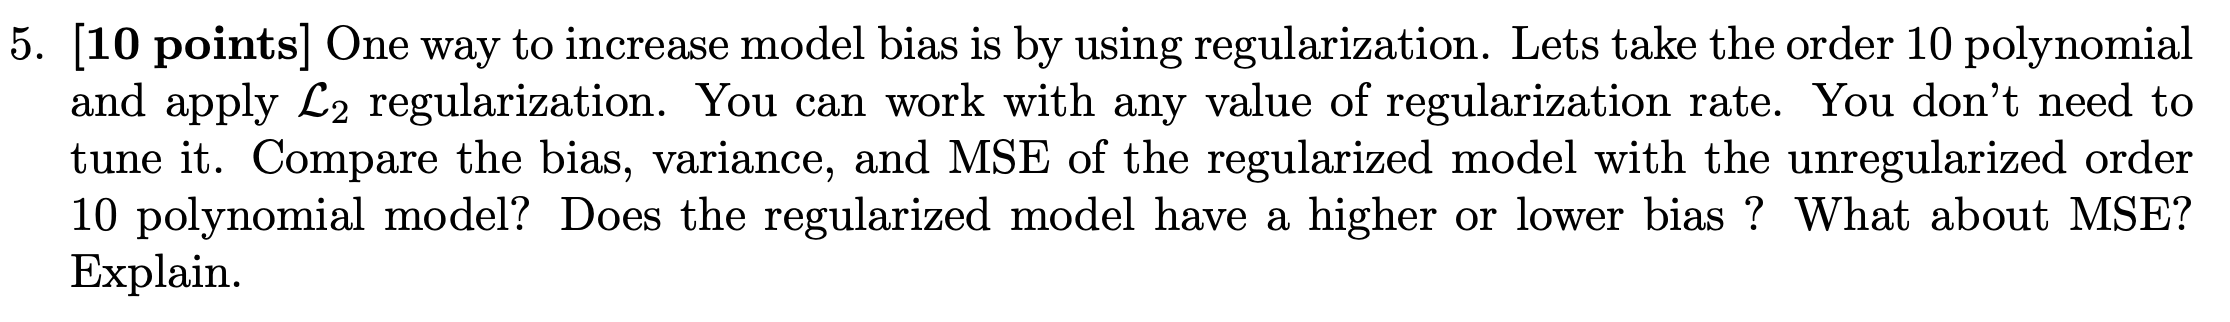

Degree = 10, Ridge alpha = 15.0

Unregularized model:
 Bias^2=858658.8329,
 Variance=195023690.6393,
 MSE=195882349.7722,
 MSE with noise=195882273.7872

Regularized model:
 Bias^2=493410.6571,
 Variance=4177458.6902,
 MSE=4670869.6473,
 MSE with noise=4670922.3403



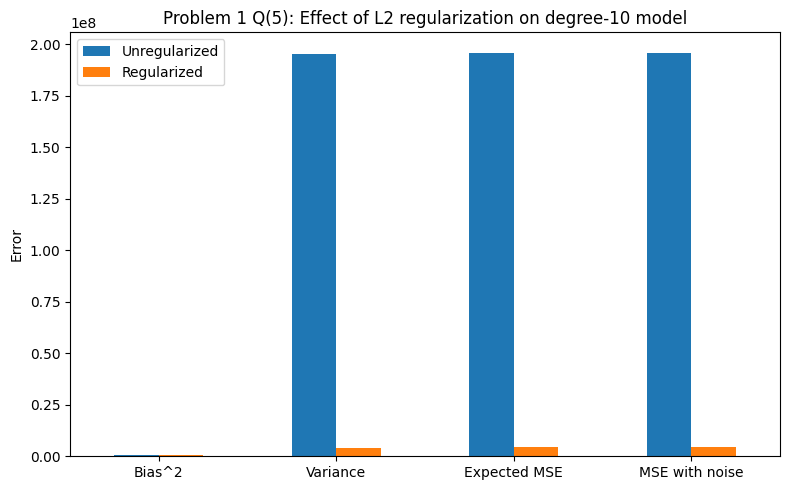

In [38]:
import warnings
warnings.filterwarnings("ignore", message=".*Ill-conditioned matrix.*")


from sklearn.linear_model import Ridge

rng = np.random.default_rng(42)
num_dataset = 100
dataset_size = 50
train_frac = 0.8
num_train = int(dataset_size * train_frac)
num_test = dataset_size - num_train
degree = 10
NOISE_VAR = 0.3
NOISE_STD = np.sqrt(NOISE_VAR)
ALPHA = 15.0

def f(x):
    return x + np.sin(1.5 * x)

def sample_xy(n):
    x = np.sort(rng.uniform(0, 10, size=n))
    y = f(x) + rng.normal(0, NOISE_STD, size=n)
    return x, y

# fix test set & noiseless targets for bias/variance
x_test = np.sort(rng.uniform(0, 10, size=num_test))
y_true_test = f(x_test)

# generate 100 training sets
datasets = []
for _ in range(num_dataset):
    x_all, y_all = sample_xy(dataset_size)
    x_train, y_train = x_all[:num_train], y_all[:num_train]
    datasets.append((x_train, y_train))

def eval_model(defined_model):
    preds = []
    mses_with_noise = []
    for (x_train, y_train) in datasets:
        poly = PolynomialFeatures(degree, include_bias=False)
        X_train = poly.fit_transform(x_train.reshape(-1,1))
        model = defined_model()
        model.fit(X_train, y_train)

        X_test = poly.transform(x_test.reshape(-1,1))
        y_pred = model.predict(X_test)
        preds.append(y_pred)

        # test MSE with noisy labels
        y_test_noisy = y_true_test + rng.normal(0, NOISE_STD,
                                                size=y_true_test.shape)
        mses_with_noise.append(mean_squared_error(y_test_noisy, y_pred))

    preds = np.stack(preds, axis=0) # [num_dataset, num_test]
    mean_pred = preds.mean(axis=0) # E[g(x)]
    var_pred = preds.var(axis=0, ddof=0) # Var[g(x)]
    bias2 = np.mean((mean_pred - y_true_test)**2)
    var = np.mean(var_pred)
    mse_expected = bias2 + var + NOISE_VAR
    mse_with_noise = float(np.mean(mses_with_noise))
    return bias2, var, mse_expected, mse_with_noise

# Unregularized (degree: 10)
b2_base, var_base, mse_base, mse_noise_base = eval_model(lambda: LinearRegression())

# Regularized (degree: 10 + L2)
b2_L2, var_L2, mse_L2, mse_noise_L2 = eval_model(lambda: Ridge(alpha=ALPHA))

print(f"Degree = {degree}, Ridge alpha = {ALPHA}\n")
print("Unregularized model:\n Bias^2={:.4f},\n Variance={:.4f},\n MSE={:.4f},\n MSE with noise={:.4f}\n".format(b2_base, var_base, mse_base, mse_noise_base))
print("Regularized model:\n Bias^2={:.4f},\n Variance={:.4f},\n MSE={:.4f},\n MSE with noise={:.4f}\n".format(b2_L2, var_L2, mse_L2, mse_noise_L2))

labels = ["Bias^2", "Variance", "Expected MSE", "MSE with noise"]
unreg = [b2_base, var_base, mse_base, mse_noise_base]
reg = [b2_L2, var_L2, mse_L2, mse_noise_L2]

df = pd.DataFrame({
    "Unregularized": unreg,
    "Regularized": reg
}, index=labels)

ax = df.plot(kind="bar", figsize=(8,5), title="Problem 1 (5): Effect of L2 regularization")
ax.set_ylabel("Error")
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
plt.title("Problem 1 Q(5): Effect of L2 regularization on degree-10 model")
plt.legend()
plt.tight_layout()
plt.show()

Compared to the unregularized 10th-degree polynomial, the L2-regularized model (alpha=15) exhibits lower bias, much lower variance, and therefore much lower test MSE. In our run, Bias^2 decreased from 8.6×10^5 to 4.9×10^5, while Variance dropped from 1.95×10^8 to 4.18×10^6. The dramatic variance reduction dominates, yielding a large reduction in MSE.

Regularization reduces overfitting, leading to better generalization performance on unseen data. The key trade-off is that the substantial variance reduction outweighs any change in bias, which is especially beneficial in complex models like high-degree polynomials. As a result, the MSE decreases significantly after applying regularization.

# Problem 2: Efficiency of Synchronous SGD Across Servers
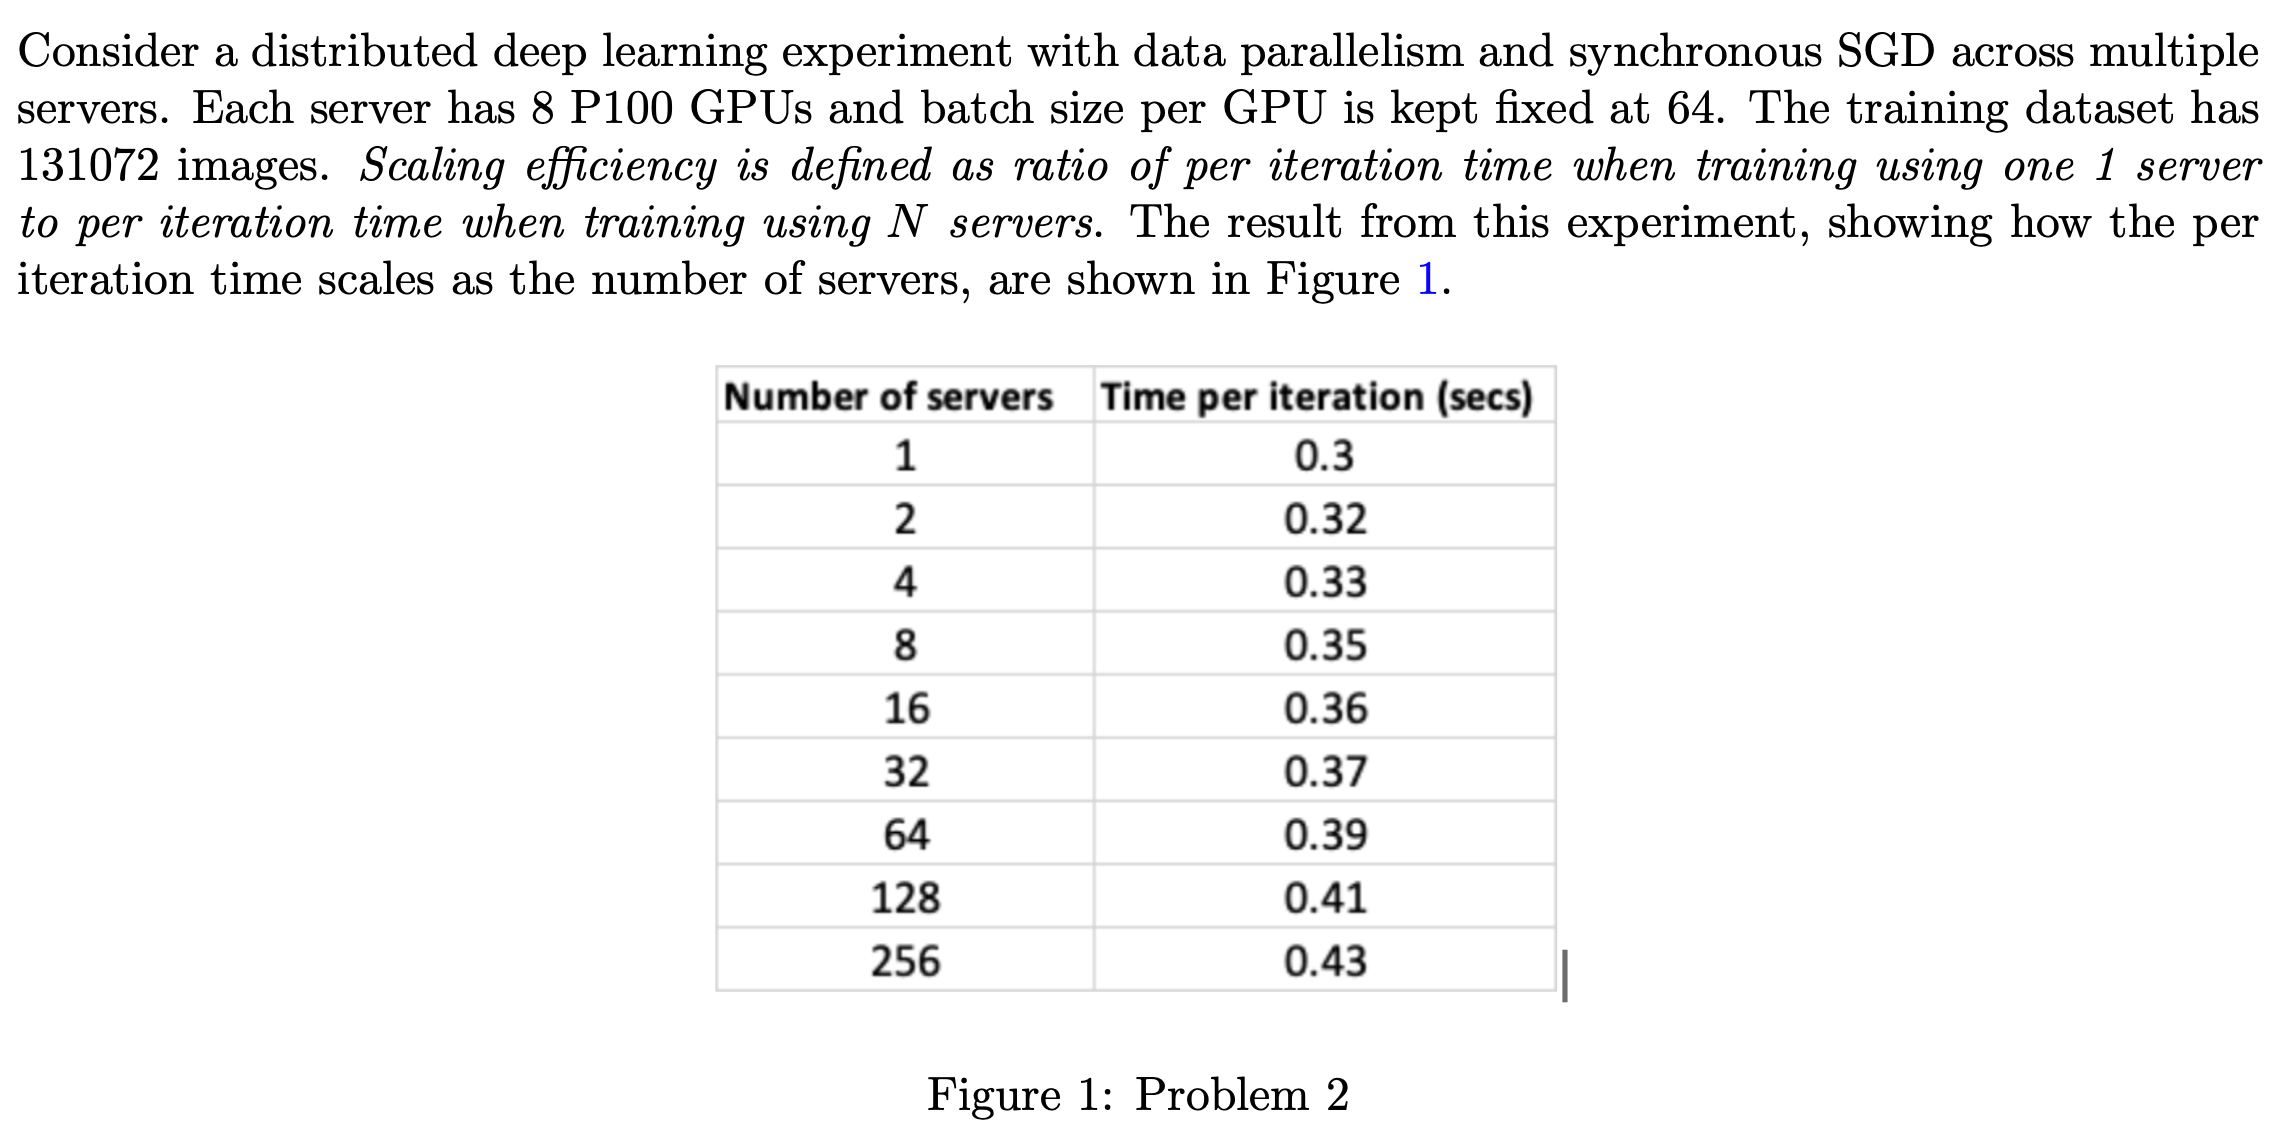

In [39]:
import matplotlib.pyplot as plt
import numpy as np

servers = np.array([1,2,4,8,16,32,64,128,256])
time_per_iter = np.array([0.30, 0.32, 0.33, 0.35, 0.36, 0.37, 0.39, 0.41, 0.43])

num_dataset = 131072
batch_per_gpu = 64
gpus_per_server = 8
batch_per_server = batch_per_gpu * gpus_per_server

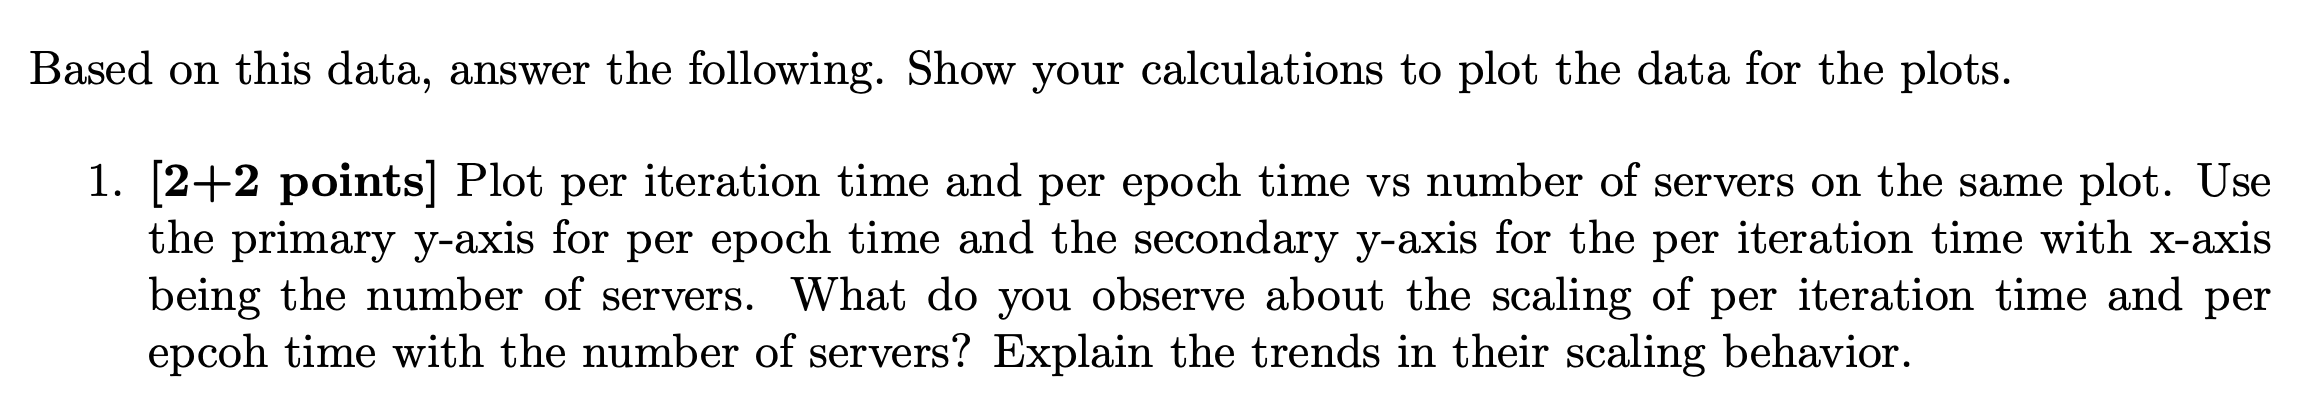

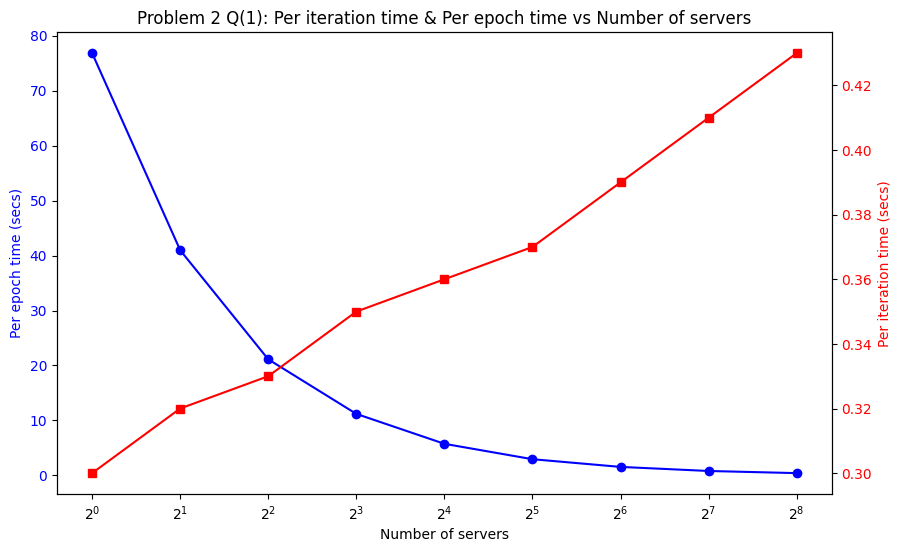

In [43]:
# per iteration time, per epoch time vs num of server

iters_per_epoch = num_dataset / (servers * batch_per_server)
time_per_epoch = time_per_iter * iters_per_epoch

fig, ax1 = plt.subplots(figsize=(10,6))

# per epoch time
ax1.set_xlabel("Number of servers")
ax1.set_ylabel("Per epoch time (secs)", color='blue')
ax1.plot(servers, time_per_epoch, marker='o', color='blue', label="Per epoch time")
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_xscale("log", base=2)

# per iteration time
ax2 = ax1.twinx()
ax2.set_ylabel("Per iteration time (secs)", color='red')
ax2.plot(servers, time_per_iter, marker='s', color='red', label="Per iteration time")
ax2.tick_params(axis='y', labelcolor='red')

plt.title("Problem 2 Q(1): Per iteration time & Per epoch time vs Number of servers")
plt.show()

I use a logarithmic scale on the x-axis because the number of servers deoubles each step, and this makes scalability trends easier to observe.

Per iteration time (red curve) increases gradually with the number of servers due to the synchronization or communication overhead of synchronous SGD. With more servers and GPUs, gradients need to be exchanged across machines and all workers must wait until synchronization is complete, which increases the iteration time.

On the other hand, per epoch time (blue curve) decreases rapidly, approximately following a log scale. This is because the effective global batch size grows linearly with the number of servers, so the number of iterations required to process the dataset decreases proportionally as 1/N.

At small server counts, computation dominates, so adding servers leads to large reductions in epoch time. However, at larger server counts, communication overhead dominates, leading to diminishing returns. This illustrates the trade-off between iteration time and epoch time: while epoch time decreases efficiently with more servers (leading to shorter total training time), iteration time increases, reducing per-GPU efficiency and lowering resource utilization.


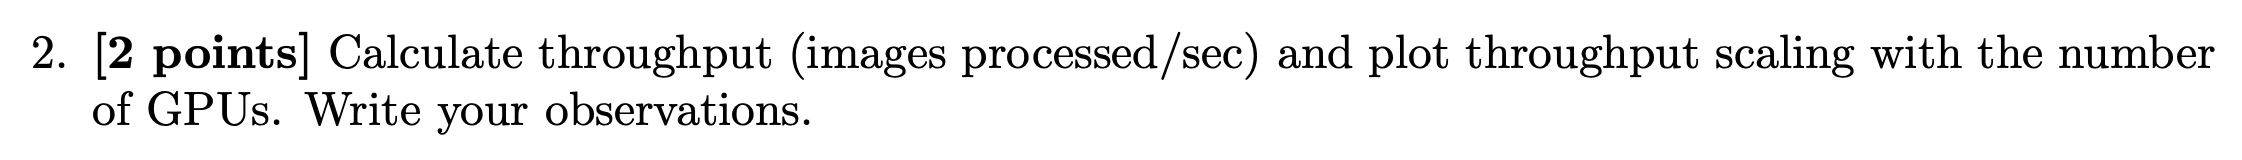

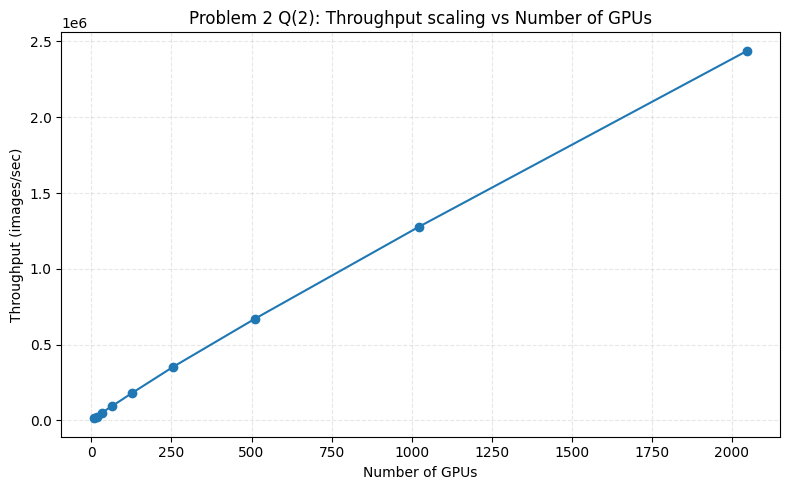

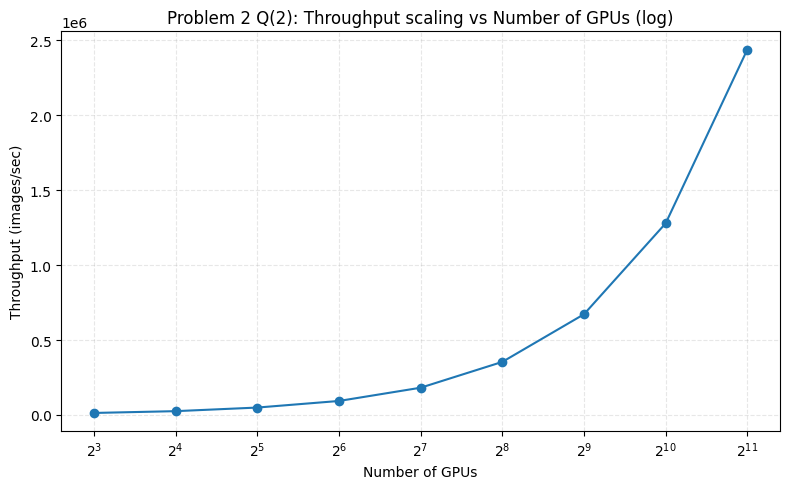

In [48]:
# throughput
total_gpus = servers * gpus_per_server
images_per_iter = batch_per_server * total_gpus
throughput = images_per_iter / time_per_iter # images/sec

plt.figure(figsize=(8,5))
plt.plot(total_gpus, throughput, marker='o')
plt.xlabel("Number of GPUs")
plt.ylabel("Throughput (images/sec)")
plt.title("Problem 2 Q(2): Throughput scaling vs Number of GPUs")
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,5))
plt.plot(total_gpus, throughput, marker='o')
plt.xscale('log', base=2)
plt.xlabel("Number of GPUs")
plt.ylabel("Throughput (images/sec)")
plt.title("Problem 2 Q(2): Throughput scaling vs Number of GPUs (log)")
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

In [45]:
df = pd.DataFrame({
    "Servers": servers,
    "Total GPUs": total_gpus,
    "Time/iter (s)": time_per_iter,
    "Images/iter": images_per_iter,
    "Throughput (img/s)": throughput
})
print(df.round(4))

   Servers  Total GPUs  Time/iter (s)  Images/iter  Throughput (img/s)
0        1           8           0.30         4096        1.365333e+04
1        2          16           0.32         8192        2.560000e+04
2        4          32           0.33        16384        4.964848e+04
3        8          64           0.35        32768        9.362286e+04
4       16         128           0.36        65536        1.820444e+05
5       32         256           0.37       131072        3.542486e+05
6       64         512           0.39       262144        6.721641e+05
7      128        1024           0.41       524288        1.278751e+06
8      256        2048           0.43      1048576        2.438549e+06


Overall, throughput increases almost linearly as the number of GPUs increases. This is because throughput is calculated as throughput = (total batch size) / (time per iteration). The total batch size grows linearly with the number of GPUs. Although the time per iteration increases with more GPUs due to communication overhead in sync SGD, this increase is relatively small compared to the growth of the total batch size. As a result, throughput tends to scale nearly proportionally with the number of GPUs.

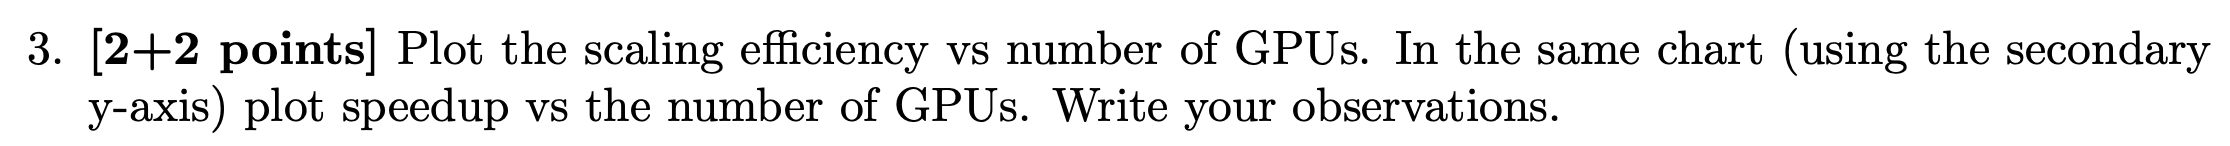

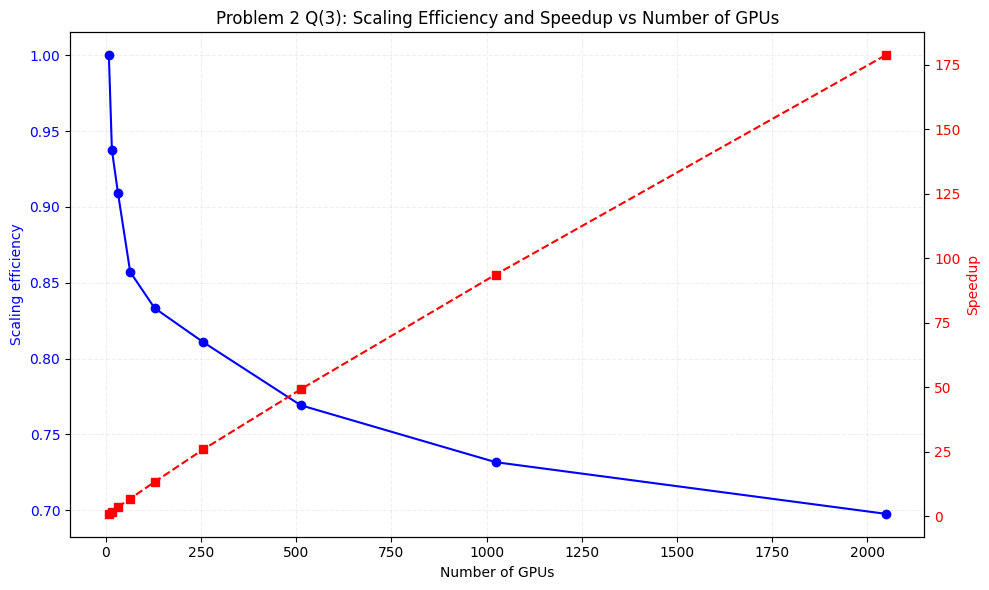

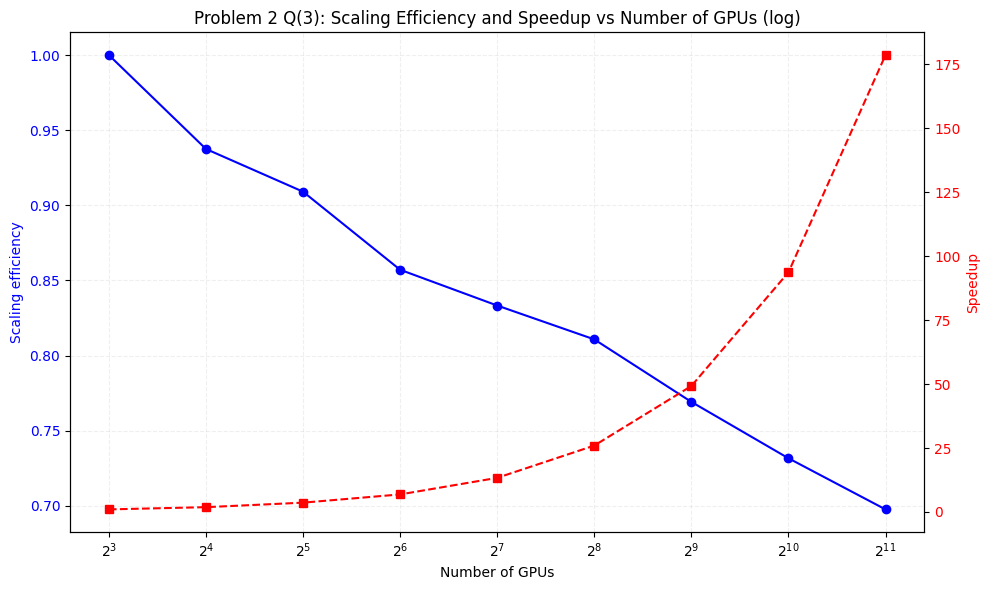

In [54]:
# scaling efficiency = actual speedup / ideal speedup
# speed up = throughput (N GPUs) / throughput (baseline)

total_gpus = servers * gpus_per_server
images_per_iter = batch_per_server * total_gpus
throughput = images_per_iter / time_per_iter # images/sec

base_throughput = throughput[0]
base_gpus = total_gpus[0]

speedup = throughput / base_throughput # speedup
ideal_speedup = total_gpus / base_gpus
efficiency = speedup / ideal_speedup # efficiency

# Scaling Efficiency
fig, ax1 = plt.subplots(figsize=(10,6))
ax1.set_xlabel("Number of GPUs")
ax1.set_ylabel("Scaling efficiency", color="blue")
ax1.plot(total_gpus, efficiency, marker='o', color="blue", label="Efficiency")
ax1.tick_params(axis='y', labelcolor="blue")
ax1.grid(True, linestyle='--', alpha=0.2)

# Speedup
ax2 = ax1.twinx()
ax2.set_ylabel("Speedup", color="red")
ax2.plot(total_gpus, speedup, marker='s', linestyle='--', color="red", label="Speedup")
ax2.tick_params(axis='y', labelcolor="red")

plt.title("Problem 2 Q(3): Scaling Efficiency and Speedup vs Number of GPUs")
fig.tight_layout()
plt.show()


###### log-scale
# Scaling Efficiency
fig, ax1 = plt.subplots(figsize=(10,6))
ax1.set_xlabel("Number of GPUs")
ax1.set_ylabel("Scaling efficiency", color="blue")
ax1.plot(total_gpus, efficiency, marker='o', color="blue", label="Efficiency")
ax1.tick_params(axis='y', labelcolor="blue")
ax1.grid(True, linestyle='--', alpha=0.2)

# Speedup
ax2 = ax1.twinx()
ax2.set_ylabel("Speedup", color="red")
ax2.plot(total_gpus, speedup, marker='s', linestyle='--', color="red", label="Speedup")
ax2.tick_params(axis='y', labelcolor="red")

plt.xscale('log', base=2)
plt.title("Problem 2 Q(3): Scaling Efficiency and Speedup vs Number of GPUs (log)")
fig.tight_layout()
plt.show()



The red plot (speedup) represents how much faster the system completes the training task as resources are added. Even on a log scale, the curve rises steeply, which indicates that despite decreasing efficiency, adding more GPUs still yields significant performance gains.

The blue plot (scaling efficiency) reflects how effectively each GPU contributes, which is limited by communication overhead and synchronization delays. Starting from 1.0 at 8 GPUs and dropping to about 0.7 at 2048 GPUs, efficiency decreases steadily as the GPU count grows. This is because, under synchronous SGD, more GPUs must exchange gradients and wait for synchronization, reducing the fraction of time each GPU spends on useful computation.

Overall, while speedup continues to increase with more GPUs, efficiency declines, demonstrating the trade-off between absolute performance and resource utilization.

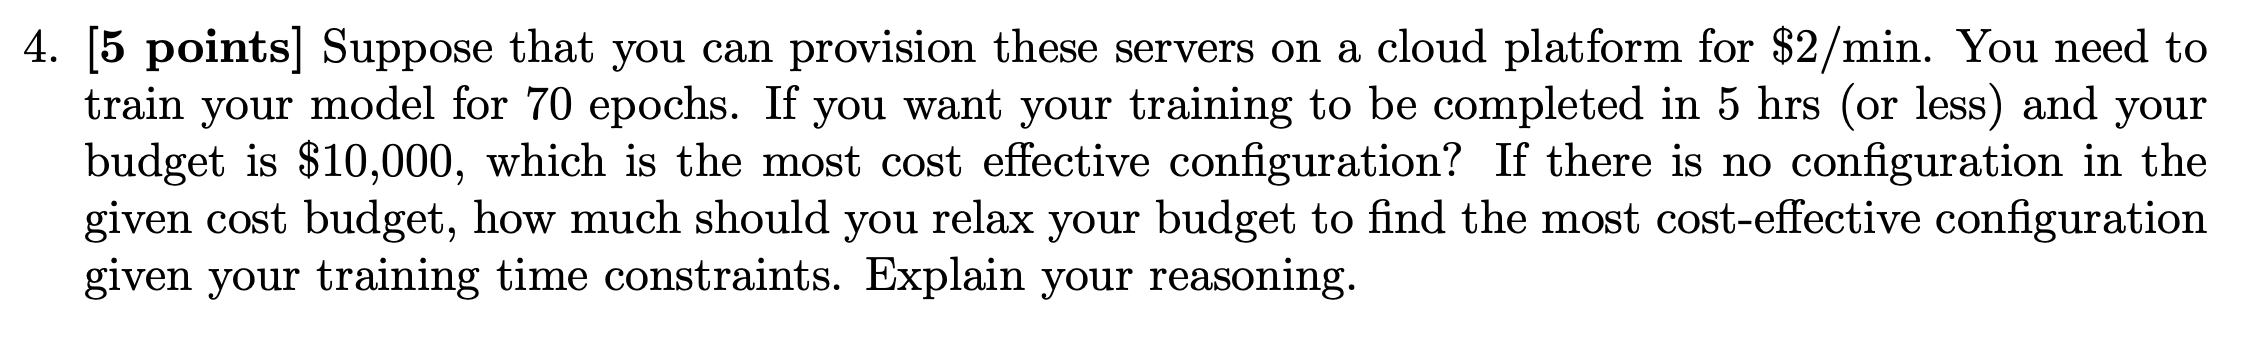

In [53]:
# $2/min, 70 epochs, within 5hrs, budget = $10,000
# batch_per_gpu = 64, gpus_per_server = 8
price_per_server_per_min = 2.0
epochs = 70

batch_per_server = batch_per_gpu * gpus_per_server
iters_per_epoch = num_dataset / (servers * batch_per_server)
time_per_epoch = time_per_iter * iters_per_epoch
total_time = time_per_epoch * epochs
total_time_minutes = total_time / 60.0
total_time_hours = total_time / 3600.0

costs = total_time_minutes * servers * price_per_server_per_min

df = pd.DataFrame({
    "Servers": servers,
    "Total GPUs": servers * gpus_per_server,
    "Time/iter (s)": time_per_iter,
    "Iters/epoch": iters_per_epoch,
    "Time/epoch (s)": time_per_epoch,
    "Total Time (hrs)": total_time_hours,
    "Cost ($)": costs
})

print(df)

   Servers  Total GPUs  Time/iter (s)  Iters/epoch  Time/epoch (s)  \
0        1           8           0.30        256.0           76.80   
1        2          16           0.32        128.0           40.96   
2        4          32           0.33         64.0           21.12   
3        8          64           0.35         32.0           11.20   
4       16         128           0.36         16.0            5.76   
5       32         256           0.37          8.0            2.96   
6       64         512           0.39          4.0            1.56   
7      128        1024           0.41          2.0            0.82   
8      256        2048           0.43          1.0            0.43   

   Total Time (hrs)    Cost ($)  
0          1.493333  179.200000  
1          0.796444  191.146667  
2          0.410667  197.120000  
3          0.217778  209.066667  
4          0.112000  215.040000  
5          0.057556  221.013333  
6          0.030333  232.960000  
7          0.015944  244.90

From the table, we can see that the total training time for 70 epochs ranges from 1.493 hours with 1 server to about 0.008 hours with 256 servers. Therefore, all server configurations satisfy the time constraint of 5 hours. In terms of cost, training with 1 server costs 179.2 dollars, and training with 256 servers costs 256.9 dollars. Thus, all configurations also satisfy the budget constraint of $10,000.

Since every configuration meets both constraints, the most cost-effective setup is with **1 server (8 GPUs)**. With just 1 server, the training finishes in 1.49 hours, well below the 5-hour limit, and incurs the lowest cost. Increasing the number of servers further reduces training time, but at the expense of lower efficiency: the speedup diminishes relative to the additional resources, and the overall cost increases. Hence, the configuration with 1 server (8 GPUs) is the most cost-effective choice.

# Problem 3: Sync and Async SGD
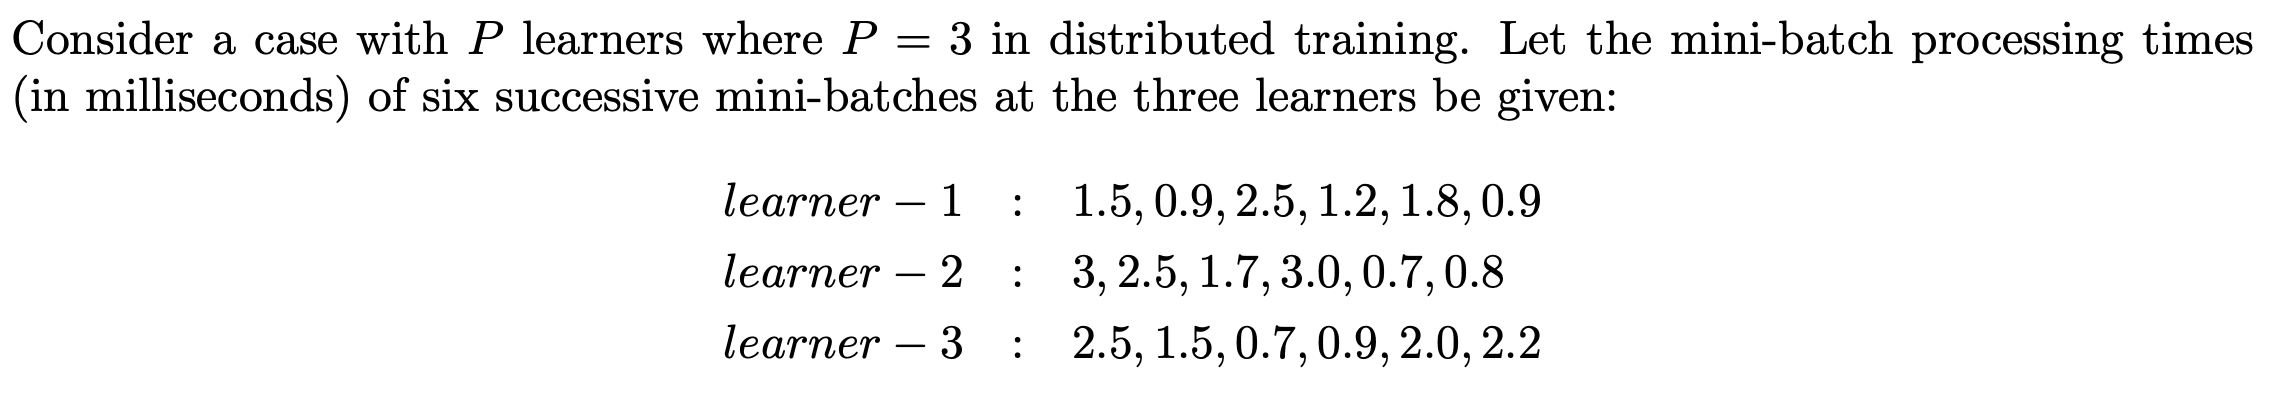
Calculate the time to have three updates of the model parameters at the parameter server under following three algorithms:

### 1. Sync (fully synchronous)

In fully synchronous SGD, one update requires all learners to finish one mini-batch. The time taken for one update is determined by the slowest learner. Thus, T_k = max(Ti_1, Ti_2, Ti_3) for i=1 to k, where Ti_j is the time for mini-batch i at learner j.
- Update 1: max(1.5, 3.0, 2.5) = 3.0 => cumulative time: 3.0 ms
- Update 2: max(0.9, 2.5, 1.5) = 2.5 => cumulative time: 5.5 ms
- Update 3: max(2.5, 1.7, 0.7) = 2.5 => cululative time: 8.0 ms

Therefore, the time to have three updates under fully synchronous SGD is **8.0 ms**.

### 2. 2-sync

The K-sync algorithm requires K learners to complete their mini-batches before a model update occurs. According to the question, K=2 and P=3. An update happens as soon as any 2 out of 3 learners finish their current mini-batch. Since the learners are working on the same mini-batch index, for the k-th update, the time taken will be the second fastest time among the times for mini-batch k.

- Update 1: second-fatest time(1.5, 3.0, 2.5) = 2.5 => total time: 2.5 ms
  - Learner 2's in-flight batch is dropped.
- Update 2: second-fatest time(0.9, 2.5, 1.5) = 1.5 => total time: 2.5 + 1.5 = 4.0 ms
  - Learner 2's in flight batch is dropped
- Update 3: second-fatest time(2.5, 1.7, 0.7) = 1.7 => total time: 4.0 + 1.7 = 5.7ms
  - Learner 1's in flight batch is dropped

Therefore, the time to have three updates under 2-sync is **5.7 ms**.

### 3. 2-batch sync

The 2-batch sync requires all three learners to complete 2 mini-batches before update. The update time is determined by the slowest learner over the two mini-batches.
- Update 1: Requires all learners to complete mini-batches 1 and 2.
  - Learner 1: 1.5 + 0.9 = 2.4 ms
  - Learner 2: 3.0 + 2.5 = 5.5 ms
  - Learner 3: 2.5 + 1.5 = 4.0 ms
  - Update Time 1: max(2.4, 5.5, 4.0) = 5.5 ms
- Update 2: Requires all learners to complete mini-batches 3 and 4.
  - Learner 1: 2.5 + 1.2 = 3.7 ms
  - Learner 2: 1.7 + 3.0 = 4.7 ms
  - Learner 3: 0.7 + 0.9 = 1.6 ms
  - Update Time 2: max(3.7, 4.7, 1.6) = 4.7 ms
  - Cumulative time: 5.5 + 4.7 = 10.2 ms
- Update 3: Requires all learners to complete mini-batches 5 and 6.
  - Learner 1: 1.8 + 0.9 = 2.7 ms
  - Learner 2: 0.7 + 0.8 = 1.5 ms
  - Learner 3: 2.0 + 2.2 = 4.2 ms
  - Update Time 2: max(2.7, 1.5, 4.2) = 4.2 ms
  - Cumulative time: 10.2 + 4.2 = 14.4 ms

The time to have three updates under 2-batch sync is **14.4 ms**.

### 4. Async

In asynchronous SGD, an update occurs as soon as any single learner finishes a mini-batch and sends its gradients. The parameter server updates the model immediately and the learner starts on the next mini-batch with the new model. The learners work independetly, starting new mini-batches as soon as they finish the previous one.
- Learner 1 completion time: 1.5, 2.4, 4.9, 6.1, 7.9, 8.8
- Learner 2 completion time: 3.0, 5.5, 7.2, 10.2, 10.9, 11.7
- Learner 3 completion time: 2.5, 4.0, 4.7, 5.6, 7.6, 9.8

The earliest three completions are 1.5 (Learner 1), 2.4 (Learner 2), and 2.5 (Learner 3).

Therefore, the time to have three updates under async is **2.5 ms**.

### 5. 2-batch async

In 2-batch async, an update occurs as soon as any single learner completes 2 mini-batches. The update time is the time it takes the fastest learner to finish two mini-batches.
- Learner 1: 2.5, 6.1, 8.8
- Learner 2: 5.5, 10.2, 11.7
- Learner 3: 4.0, 5.6, 9.8

The first three events are 2.4 (Learner 1), 4.0 (Learner 3), 5.5 (Learner 2).

Therefore, the time to have three updates under 2-batch async is **5.5 ms**.